In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bethe_lattice import bethe_green_function
from mesh import Meshiw, Meshitau
from green_function import Giw, make_Gtau_from_Giw
from monte_carlo import monte_carlo_sampling

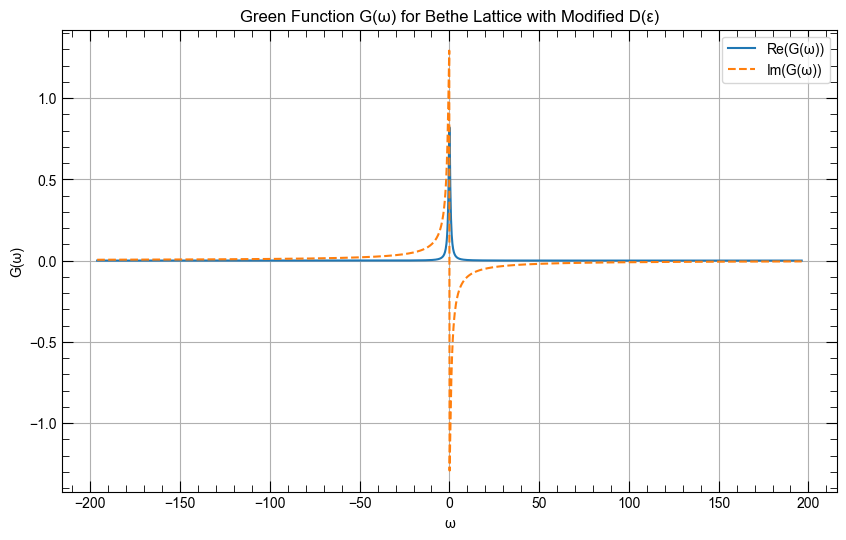

In [2]:
# パラメータの設定
W = 1.0  # 帯域幅
D_0 = 2.0 / np.pi  # 正規化定数 (D_0 = 2/π を仮定)
delta = 0.00  # 正の無限小量
beta = 32  # 逆温度
U = 0.7  # 相互作用

# マツバラ周波数の定義
meshiw = Meshiw(beta, 1000)

# グリーン関数の計算
giw_values = np.array(
    [bethe_green_function(1.0j * omega, W, D_0, delta) for omega in meshiw.iw]
)
giw_values = 1 / (1 / giw_values + U / 2)
giw = Giw(meshiw, giw_values)

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(giw.meshiw.iw, giw.giw_value.real, label="Re(G(ω))")
plt.plot(giw.meshiw.iw, giw.giw_value.imag, label="Im(G(ω))", linestyle="dashed")
plt.xlabel("ω")
plt.ylabel("G(ω)")
plt.title("Green Function G(ω) for Bethe Lattice with Modified D(ε)")
plt.legend()
plt.grid(True)
plt.show()

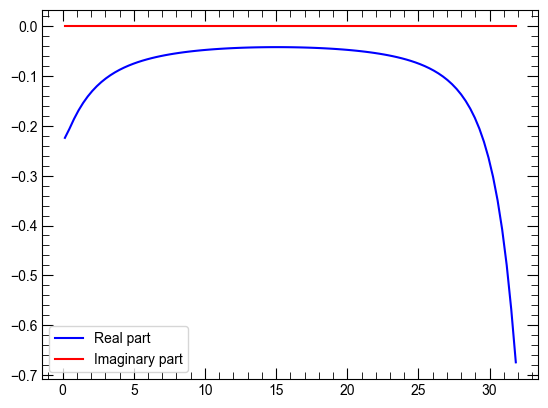

In [3]:
# Gtauへの変換
gtau = make_Gtau_from_Giw(giw, 100)

# プロット (imaginary time)
fig, ax = plt.subplots()
ax.plot(gtau.meshitau.tau, np.real(gtau.gtau_value), "b-", label="Real part")
ax.plot(gtau.meshitau.tau, np.imag(gtau.gtau_value), "r-", label="Imaginary part")
ax.legend()

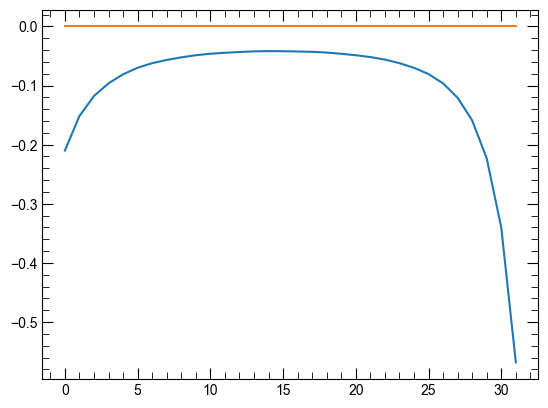

In [4]:
# g0_tauの計算
n_tau = 32
gtau = make_Gtau_from_Giw(giw, n_tau)
g0_tau = np.zeros((n_tau, n_tau), dtype=complex)
delta_tau = beta / n_tau
for i in range(n_tau):
    for j in range(n_tau):
        g0_tau[i, j] = gtau.gtau_value[i - j] * np.where(
            i - j > 0, 1, np.where(i - j < 0, -1, 1)
        )
# g0_tauのプロット
fig, ax = plt.subplots()
ax.plot(g0_tau[:, 0].real, label="Real part")
ax.plot(g0_tau[:, 0].imag, label="Imaginary part")

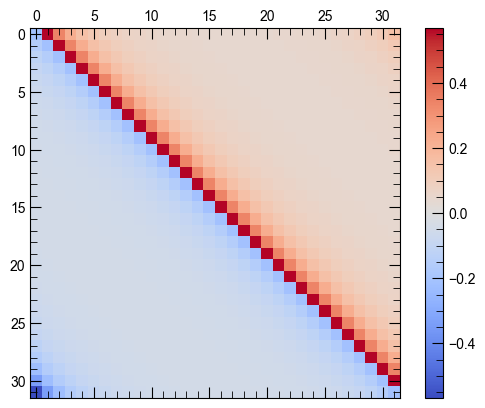

In [5]:
# g0_tauの２次元のヒートマップを描画
fig, ax = plt.subplots()
cax = ax.matshow(g0_tau.real, cmap="coolwarm")
fig.colorbar(cax)
plt.show()

In [6]:
# 相互作用の設定
U = 0.7
n_tau = 32
n_warmup = 100
n_cycle = 1000
g_up, g_dn = monte_carlo_sampling(
    g0_tau, U, delta_tau, n_tau, n_warmup=100, n_cycle=1000
)

n_warmup: 0
n_warmup: 1
n_warmup: 2
n_warmup: 3
n_warmup: 4
n_warmup: 5
n_warmup: 6
n_warmup: 7
n_warmup: 8
n_warmup: 9
n_warmup: 10
n_warmup: 11
n_warmup: 12
n_warmup: 13
n_warmup: 14
n_warmup: 15
n_warmup: 16
n_warmup: 17
n_warmup: 18
n_warmup: 19
n_warmup: 20
n_warmup: 21
n_warmup: 22
n_warmup: 23
n_warmup: 24
n_warmup: 25
n_warmup: 26
n_warmup: 27
n_warmup: 28
n_warmup: 29
n_warmup: 30
n_warmup: 31
n_warmup: 32
n_warmup: 33
n_warmup: 34
n_warmup: 35
n_warmup: 36
n_warmup: 37
n_warmup: 38
n_warmup: 39
n_warmup: 40
n_warmup: 41
n_warmup: 42
n_warmup: 43
n_warmup: 44
n_warmup: 45
n_warmup: 46
n_warmup: 47
n_warmup: 48
n_warmup: 49
n_warmup: 50
n_warmup: 51
n_warmup: 52
n_warmup: 53
n_warmup: 54
n_warmup: 55
n_warmup: 56
n_warmup: 57
n_warmup: 58
n_warmup: 59
n_warmup: 60
n_warmup: 61
n_warmup: 62
n_warmup: 63
n_warmup: 64
n_warmup: 65
n_warmup: 66
n_warmup: 67
n_warmup: 68
n_warmup: 69
n_warmup: 70
n_warmup: 71
n_warmup: 72
n_warmup: 73
n_warmup: 74
n_warmup: 75
n_warmup: 76
n_warmup:

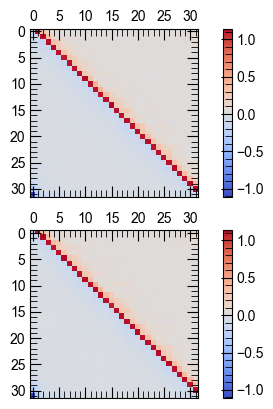

In [7]:
# 平均化されたグリーン関数のプロット
fig, ax = plt.subplots(2, 1)

cax = ax[0].matshow(g_up.real, cmap="coolwarm")
fig.colorbar(cax, ax=ax[0])

cax = ax[1].matshow(g_dn.real, cmap="coolwarm")
fig.colorbar(cax, ax=ax[1])

plt.show()

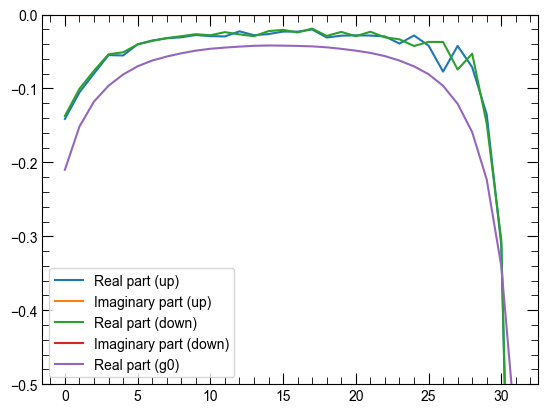

In [8]:
fig, ax = plt.subplots()
ax.plot(g_up[:, 0].real, label="Real part (up)")
ax.plot(g_up[:, 0].imag, label="Imaginary part (up)")
ax.plot(g_dn[:, 0].real, label="Real part (down)")
ax.plot(g_dn[:, 0].imag, label="Imaginary part (down)")
ax.plot(g0_tau[:, 0].real, label="Real part (g0)")
ax.set_ylim(-0.5, 0.0)
ax.legend()
plt.show()